In [2]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

KeyboardInterrupt: 

In [3]:
xtr.shape

(50000, 32, 32, 3)

In [4]:
plt.imshow(xtr[99], cmap='gray')

In [5]:
ytr[99]

array([1], dtype=uint8)

In [6]:
plt.imshow(xte[99], cmap='gray')

In [7]:
yte[99]

array([7], dtype=uint8)

In [8]:
ytr=tcg(ytr)
yte=tcg(yte)

In [9]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255


In [10]:
model = Sequential([
 Flatten(input_shape=(32, 32, 3)),
 Dense(256, activation='relu'),
 Dense(128, activation='relu', kernel_initializer='he_uniform'),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax'),
])

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=64)


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 7s 150us/sample - loss: 1.8774 - accuracy: 0.3257 - val_loss: 1.7663 - val_accuracy: 0.3773
Epoch 2/15
50000/50000 [==============================] - 7s 133us/sample - loss: 1.6925 - accuracy: 0.3908 - val_loss: 1.6501 - val_accuracy: 0.4100
Epoch 3/15
50000/50000 [==============================] - 6s 125us/sample - loss: 1.6117 - accuracy: 0.4202 - val_loss: 1.5865 - val_accuracy: 0.4340
Epoch 4/15
50000/50000 [==============================] - 6s 122us/sample - loss: 1.5540 - accuracy: 0.4460 - val_loss: 1.5203 - val_accuracy: 0.4553
Epoch 5/15
50000/50000 [==============================] - 6s 120us/sample - loss: 1.5132 - accuracy: 0.4590 - val_loss: 1.4996 - val_accuracy: 0.4688
Epoch 6/15
50000/50000 [==============================] - 6s 122us/sample - loss: 1.4774 - accuracy: 0.4709 - val_loss: 1.4892 - val_accuracy: 0.4663
Epoch 7/15
50000/50000 [==========================

In [13]:
model.evaluate(xtr,ytr)

50000/50000 [==============================] - 2s 47us/sample - loss: 1.3028 - accuracy: 0.5390


[1.302810124130249, 0.539]

In [14]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 1s 54us/sample - loss: 1.4665 - accuracy: 0.4879


In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4665444717407226
Test accuracy: 0.4879


In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

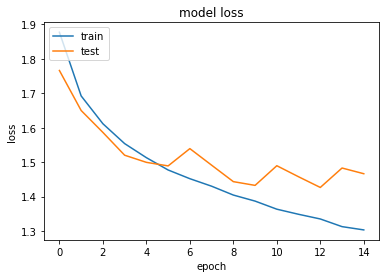

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
model.save('FFNN_CIFAR10.h5')